In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_excel("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Final Project/nationaldatabaseofchildcareprices.xlsx")
wages = pd.read_excel("C:/Users/kromi/OneDrive/Bellevue/Data Presentation and Visualizations/Final Project/oesm23nat/national_M2023_dl.xlsx")
#Data from the US Bureau of Labor Statistics.

In [42]:
df.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [43]:
df.shape

(34567, 227)

In [44]:
print(df.columns.tolist())

['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code', 'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64', 'FUNR_20to64', 'MUNR_20to64', 'FLFPR_20to64', 'FLFPR_20to64_Under6', 'FLFPR_20to64_6to17', 'FLFPR_20to64_Under6_6to17', 'MLFPR_20to64', 'PR_F', 'PR_P', 'MHI', 'ME', 'FME', 'MME', 'MHI_2018', 'ME_2018', 'FME_2018', 'MME_2018', 'TotalPop', 'OneRace', 'OneRace_W', 'OneRace_B', 'OneRace_I', 'OneRace_A', 'OneRace_H', 'OneRace_Other', 'TwoRaces', 'Hispanic', 'Households', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 'H_6to17_Mwork', 'H_6to17_SingleM', 'EMP_M', 'MEMP_M', 'FEMP_M', 'EMP_Service', 'MEMP_Service', 'FEMP_Service', 'EMP_Sales', 'MEMP_Sales', 'FEMP_Sales', 'EMP_N', 'MEMP_N', 'FEMP_N', 'EMP_P', 'MEMP_P', 'FEMP_P', 'iUNR_16', 'iFUNR_16', 'iMUNR_16', 'iUNR_20to64', 'iFUNR_20to64', 'iMUNR_20to64', 'iFLFPR_20to64', 'iFLFPR_20to64_Under6', 'iFLFPR_20to64_6to17', 'iFLFPR_20to64_Under6_6to17',

In [45]:
columns_to_keep = ['State_Abbreviation', 'County_Name', 'StudyYear', 'UNR_16', 'FUNR_16', 'UNR_20to64', 'FUNR_20to64', 
                   'FLFPR_20to64', 'FLFPR_20to64_Under6', 'FLFPR_20to64_6to17', 'FLFPR_20to64_Under6_6to17', 'PR_F', 'MHI', 'ME', 'FME', 'TotalPop',
                   'Households', 'EMP_M', 'FEMP_M', 'EMP_Service', 'FEMP_Service', 'EMP_Sales', 'FEMP_Sales', 'EMP_N', 'FEMP_N', 'EMP_P', 'FEMP_P',
                   'MCSA', 'MFCCSA', 'MCInfant', 'MCToddler', 'MCPreschool', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool']

df = df[columns_to_keep]

In [46]:
df = df.rename(columns = {
    'State_Abbreviation': 'State',
    'County_Name': 'County',
    'StudyYear': 'Year',
    'MCSA': 'Center Based Care: School Age',
    'MFCCSA': 'Family Care: School Age',
    'MCInfant': 'Center Based Care: Infant',
    'MCToddler': 'Center Based Care: Toddler',
    'MCPreschool': 'Center Based Care: Preschool Age',
    'MFCCInfant': 'Family Care: Infant',
    'MFCCToddler': 'Family Care: Toddler',
    'MFCCPreschool': 'Family Care: Preschool Age'
    
})

In [47]:
df.isna().sum()

State                                   0
County                                  0
Year                                    0
UNR_16                                  0
FUNR_16                                 0
UNR_20to64                              0
FUNR_20to64                             0
FLFPR_20to64                            0
FLFPR_20to64_Under6                     0
FLFPR_20to64_6to17                      0
FLFPR_20to64_Under6_6to17               0
PR_F                                    0
MHI                                     0
ME                                      0
FME                                     0
TotalPop                                0
Households                              0
EMP_M                                   0
FEMP_M                                  0
EMP_Service                             0
FEMP_Service                            0
EMP_Sales                               0
FEMP_Sales                              0
EMP_N                             

In [48]:
null_counts = df.isna().sum()

columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

Center Based Care: School Age       10974
Family Care: School Age             11184
Center Based Care: Infant           10974
Center Based Care: Toddler          10974
Center Based Care: Preschool Age    10974
Family Care: Infant                 11184
Family Care: Toddler                11184
Family Care: Preschool Age          11184
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df

,State,County,Year,UNR_16,FUNR_16,UNR_20to64,FUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,FLFPR_20to64_6to17,...,EMP_P,FEMP_P,Center Based Care: School Age,Family Care: School Age,Center Based Care: Infant,Center Based Care: Toddler,Center Based Care: Preschool Age,Family Care: Infant,Family Care: Toddler,Family Care: Preschool Age
0,AL,Autauga County,2008,5.42,4.41,4.6,3.5,68.9,66.9,79.59,...,13.22,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,AL,Autauga County,2009,5.93,5.72,4.8,4.6,70.8,63.7,78.41,...,14.02,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,AL,Autauga County,2010,6.21,5.57,5.1,4.6,71.3,67.0,78.15,...,13.11,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,AL,Autauga County,2011,7.55,8.13,6.2,6.3,70.2,66.5,77.62,...,14.38,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,AL,Autauga County,2012,8.60,8.88,6.7,6.4,70.6,67.1,76.31,...,14.37,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,WY,Weston County,2014,3.60,5.36,2.4,4.8,75.9,74.8,77.38,...,16.23,6.13,91.14,112.94,147.36,120.38,123.99,110.71,110.71,111.47
34563,WY,Weston County,2015,5.16,7.86,4.2,7.6,73.2,82.0,76.70,...,18.61,6.36,94.76,110.89,140.36,118.77,118.77,110.89,110.89,110.89
34564,WY,Weston County,2016,3.61,4.67,3.4,4.5,69.7,68.1,78.50,...,16.86,6.72,98.38,108.85,133.37,117.16,113.55,114.10,111.07,110.31
34565,WY,Weston County,2017,2.24,2.64,2.3,2.8,71.4,63.6,85.10,...,19.25,4.23,102.01,106.81,126.38,115.55,108.32,117.30,111.26,109.74


In [51]:
wages.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [52]:
wages.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN


In [53]:
#Dropping unnecessary columns.
columns_to_keep = ["OCC_CODE", "OCC_TITLE", "TOT_EMP", "H_MEAN", "A_MEDIAN"]
wages = wages.loc[:, columns_to_keep]

In [54]:
#Defining the mapping based on the first two digits of OCC_CODE.
occupation_mapping = {
    '00': 'Management',
    '11': 'Management',
    '13': 'Management',
    '15': 'Management',
    '17': 'Management',
    '19': 'Management',
    '21': 'Management',
    '23': 'Management',
    '25': 'Management',
    '27': 'Management',
    '31': 'Service',
    '33': 'Service',
    '35': 'Service',
    '37': 'Service',
    '39': 'Service',
    '41': 'Sales',
    '43': 'Sales',
    '45': 'Manual',
    '47': 'Manual',
    '49': 'Manual',
    '51': 'Production',
    '53': 'Production',
}

# Creating. a new column 'Occupation Category' based on the mapping
wages['Occupation Category'] = wages['OCC_CODE'].str[:2].map(occupation_mapping)

#Dropping OCC_CODE column and removing duplicate rows.
wages = wages.drop(columns = ['OCC_CODE'])
wages = wages.drop_duplicates()
wages.head()

,OCC_TITLE,TOT_EMP,H_MEAN,A_MEDIAN,Occupation Category
0,All Occupations,151853870,31.48,48060,Management
1,Management Occupations,10495770,66.23,116880,Management
2,Top Executives,3751510,65.43,103460,Management
3,Chief Executives,211230,124.47,206680,Management
5,General and Operations Managers,3507810,62.18,101280,Management


In [55]:
wages['H_MEAN'] = pd.to_numeric(wages['H_MEAN'], errors = 'coerce')
wages['A_MEDIAN'] = pd.to_numeric(wages['A_MEDIAN'], errors = 'coerce')

In [56]:
wages = wages.dropna()

In [57]:
# Create a list of the categories
categories = [
    'Center Based Care: Infant',
    'Center Based Care: Toddler',
    'Center Based Care: Preschool Age',
    'Center Based Care: School Age'
]

# Initialize a new DataFrame to store percent changes
percent_changes = pd.DataFrame()

# Loop through each category to calculate the percent change
for category in categories:
    # Group by year and calculate the total sum for the category
    yearly_totals = df.groupby('Year')[category].sum().reset_index()
    
    # Calculate the percent change
    yearly_totals['Percent Change'] = yearly_totals[category].pct_change() * 100  # Multiply by 100 for percentage
    
    # Add the results to the percent_changes DataFrame
    percent_changes[category] = yearly_totals['Percent Change']

# Add the Year column to the percent_changes DataFrame
percent_changes['Year'] = yearly_totals['Year']

# Rearranging columns to have Year first
percent_changes = percent_changes[['Year'] + categories]

# Optionally, drop the first row of NaN values resulting from the pct_change calculation
percent_changes = percent_changes.dropna()

# Assuming the percent_changes DataFrame is already created

# Calculate the average percent change for each category, excluding the 'Year' column
average_percent_change = percent_changes.drop(columns='Year').mean()

# Convert the Series to a DataFrame for better visualization (optional)
average_percent_change_df = average_percent_change.reset_index()
average_percent_change_df.columns = ['Category', 'Average Percent Change']

# Display the average percent changes
print(average_percent_change_df)


                           Category  Average Percent Change
0         Center Based Care: Infant                7.535566
1        Center Based Care: Toddler                7.665250
2  Center Based Care: Preschool Age                7.689311
3     Center Based Care: School Age                7.997656


In [58]:
# Create a list of the categories
categories = [
    'Family Care: Infant',
    'Family Care: Toddler',
    'Family Care: Preschool Age',
    'Family Care: School Age'
]

# Initialize a new DataFrame to store percent changes
percent_changes = pd.DataFrame()

# Loop through each category to calculate the percent change
for category in categories:
    # Group by year and calculate the total sum for the category
    yearly_totals = df.groupby('Year')[category].sum().reset_index()
    
    # Calculate the percent change
    yearly_totals['Percent Change'] = yearly_totals[category].pct_change() * 100  # Multiply by 100 for percentage
    
    # Add the results to the percent_changes DataFrame
    percent_changes[category] = yearly_totals['Percent Change']

# Add the Year column to the percent_changes DataFrame
percent_changes['Year'] = yearly_totals['Year']

# Rearranging columns to have Year first
percent_changes = percent_changes[['Year'] + categories]

# Optionally, drop the first row of NaN values resulting from the pct_change calculation
percent_changes = percent_changes.dropna()

# Assuming the percent_changes DataFrame is already created

# Calculate the average percent change for each category, excluding the 'Year' column
average_percent_change = percent_changes.drop(columns='Year').mean()

# Convert the Series to a DataFrame for better visualization (optional)
average_percent_change_df = average_percent_change.reset_index()
average_percent_change_df.columns = ['Category', 'Average Percent Change']

# Display the average percent changes
print(average_percent_change_df)


                     Category  Average Percent Change
0         Family Care: Infant                7.537177
1        Family Care: Toddler                7.543830
2  Family Care: Preschool Age                7.466309
3     Family Care: School Age                7.589942


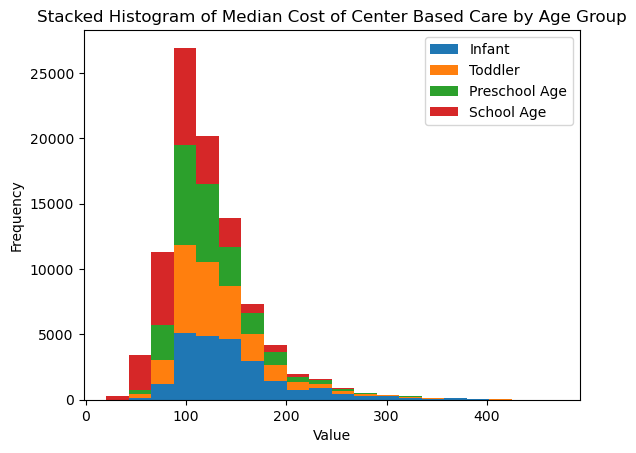

In [59]:
# Extract the specific columns for the histogram
data = [df['Center Based Care: Infant'], df['Center Based Care: Toddler'], df['Center Based Care: Preschool Age'], df['Center Based Care: School Age']]

# Plot the stacked histogram
plt.hist(data, bins=20, stacked=True, label=['Infant', 'Toddler', 'Preschool Age', 'School Age'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Median Cost of Center Based Care by Age Group')
plt.legend()

# Show the plot
plt.show()

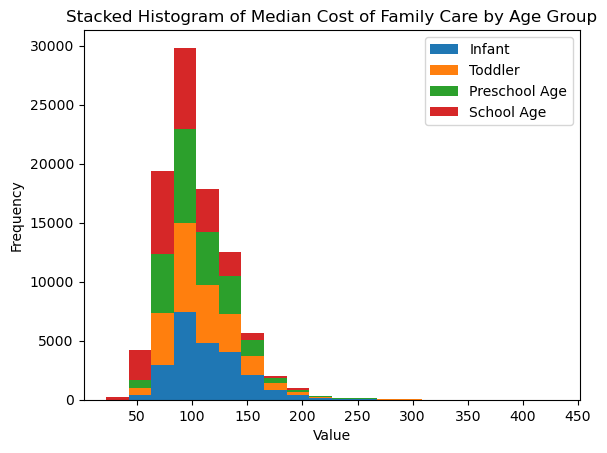

In [60]:
# Extract the specific columns for the histogram
data = [df['Family Care: Infant'], df['Family Care: Toddler'], df['Family Care: Preschool Age'], df['Family Care: School Age']]

# Plot the stacked histogram
plt.hist(data, bins=20, stacked=True, label=['Infant', 'Toddler', 'Preschool Age', 'School Age'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Median Cost of Family Care by Age Group')
plt.legend()

# Show the plot
plt.show()

In [61]:
#Specifying columns to remove outliers from.
columns = ['Center Based Care: Infant', 'Center Based Care: Toddler', 'Center Based Care: Preschool Age', 'Center Based Care: School Age',
           'Family Care: Infant', 'Family Care: Toddler', 'Family Care: Preschool Age', 'Family Care: School Age']

#Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Removing outliers from the specified columns.
for var in columns:
    df = remove_outliers_iqr(df, var)

df.shape

(21063, 35)

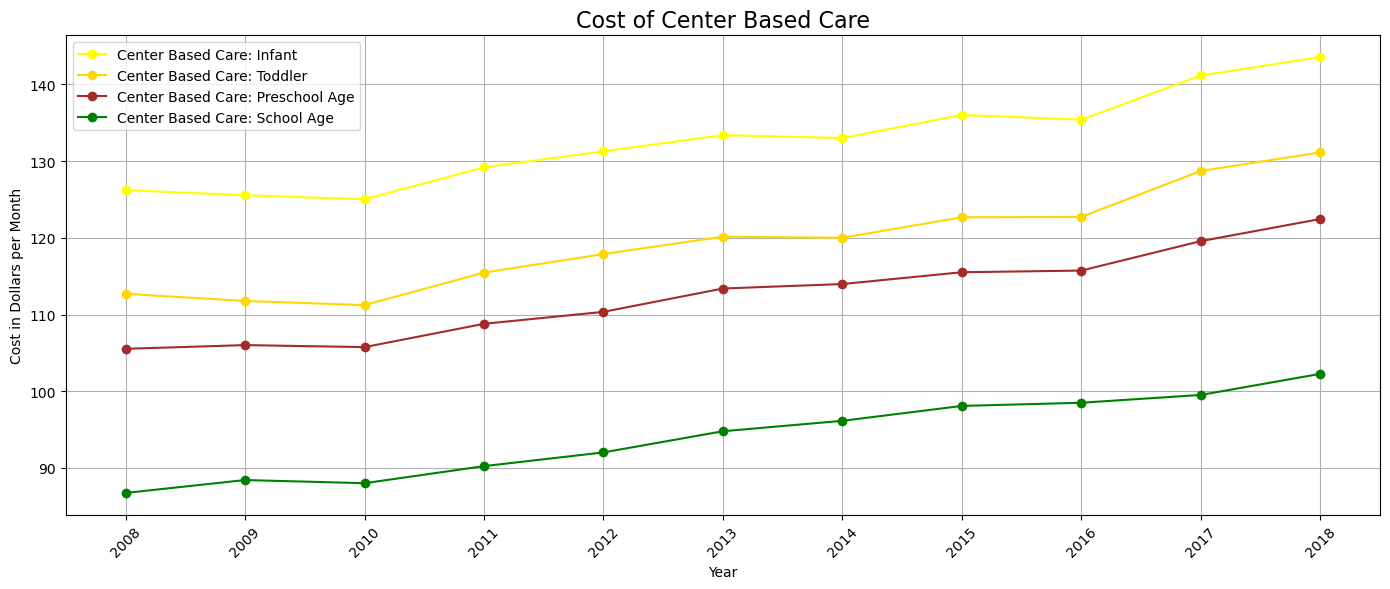

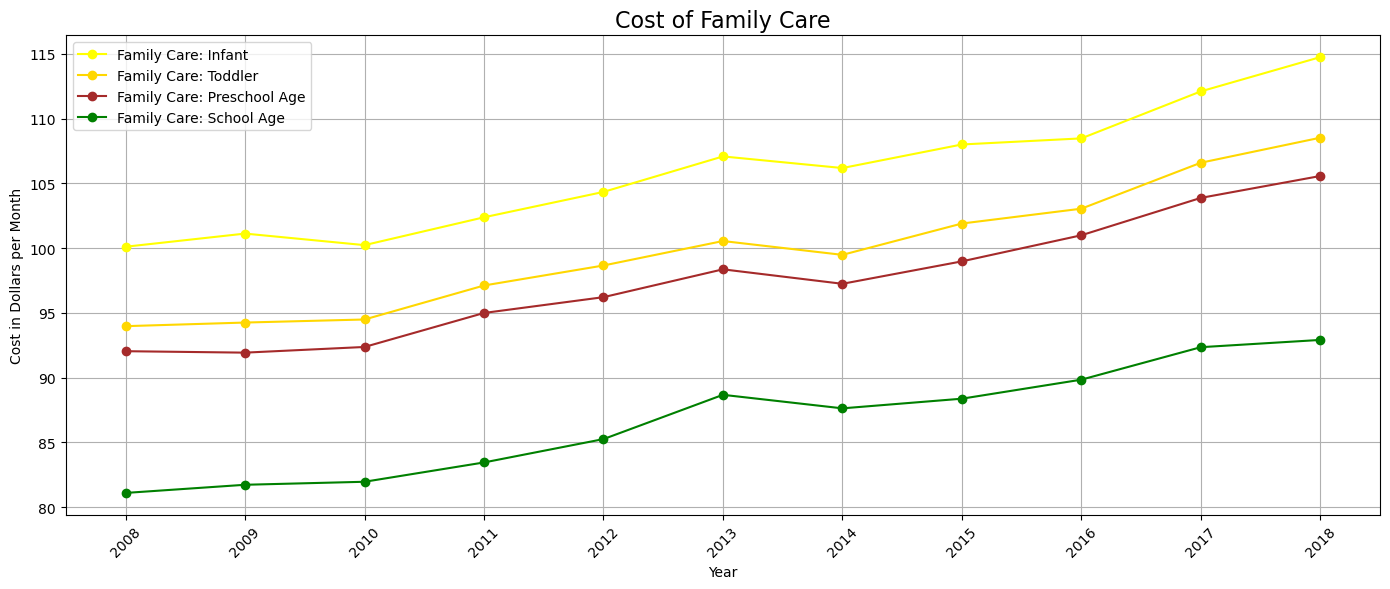

In [62]:
# Group by 'Year' and calculate the mean for the specified columns
center_based = [
    'Center Based Care: Infant', 
    'Center Based Care: Toddler', 
    'Center Based Care: Preschool Age', 
    'Center Based Care: School Age'
]

family_care = [
    'Family Care: Infant', 
    'Family Care: Toddler', 
    'Family Care: Preschool Age', 
    'Family Care: School Age'
]

# Group by year and calculate the mean
grouped_data = df.groupby('Year')[center_based + family_care].mean().reset_index()

colors = ['yellow', 'gold', 'brown', 'green']

# Plotting Center Based Care
plt.figure(figsize=(14, 6))  # Create a new figure
for i, col in enumerate(center_based):
    plt.plot(grouped_data['Year'], grouped_data[col], marker='o', label=col, color=colors[i])
plt.title('Cost of Center Based Care', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Cost in Dollars per Month', rotation = 90)
plt.xticks(grouped_data['Year'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting Family Care
plt.figure(figsize=(14, 6))
for i, col in enumerate(family_care):
    plt.plot(grouped_data['Year'], grouped_data[col], marker='o', label=col, color=colors[i])
plt.title('Cost of Family Care', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Cost in Dollars per Month', rotation = 90)
plt.xticks(grouped_data['Year'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

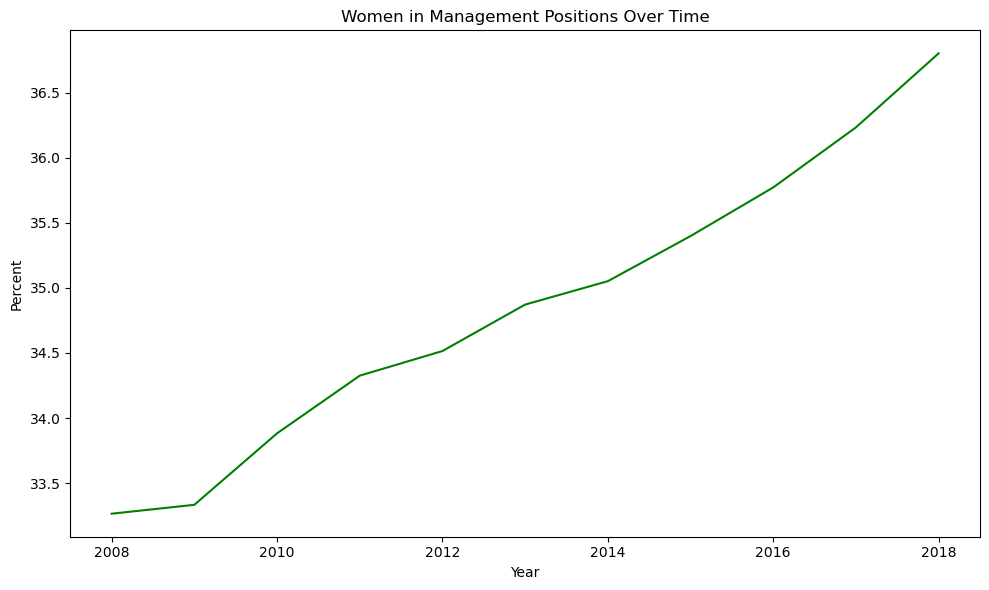

In [63]:
# Group by Year and calculate the mean percent of females in management positions
grouped_data = df.groupby('Year')['FEMP_M'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the FEMP_M variable
plt.plot(grouped_data['Year'], grouped_data['FEMP_M'], label='Percent of Females in Management', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Women in Management Positions Over Time')

# Show the plot
plt.tight_layout()
plt.show()

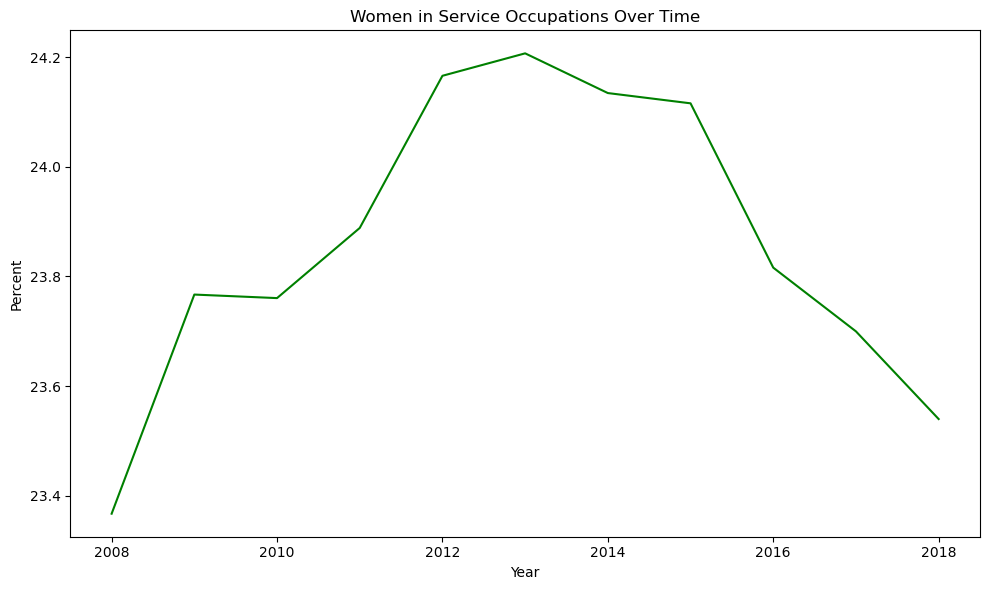

In [64]:
# Group by Year and calculate the mean percent of females in management positions
grouped_data = df.groupby('Year')['FEMP_Service'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the FEMP_M variable
plt.plot(grouped_data['Year'], grouped_data['FEMP_Service'], label='Percent of Women in Service Occupations', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Women in Service Occupations Over Time')

# Show the plot
plt.tight_layout()
plt.show()

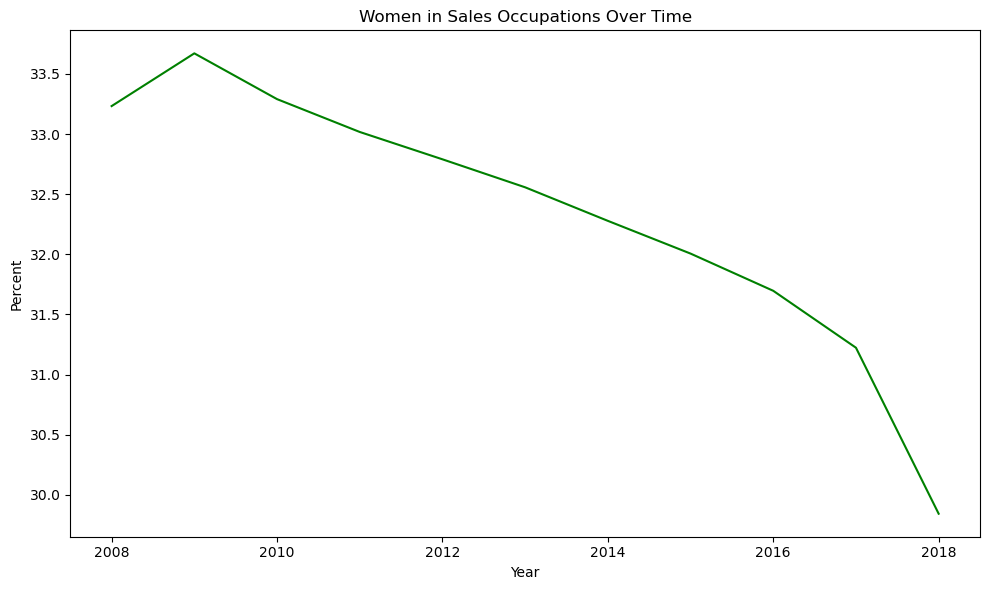

In [65]:
# Group by Year and calculate the mean percent of females in management positions
grouped_data = df.groupby('Year')['FEMP_Sales'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the FEMP_M variable
plt.plot(grouped_data['Year'], grouped_data['FEMP_Sales'], label='Percent of Women in Sales Occupations', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Women in Sales Occupations Over Time')

# Show the plot
plt.tight_layout()
plt.show()

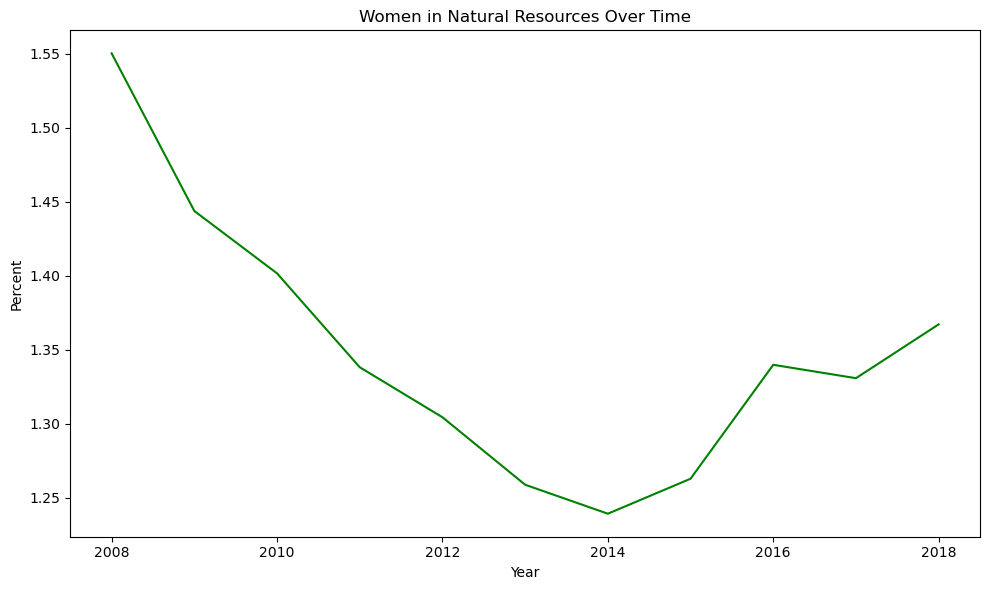

In [66]:
# Group by Year and calculate the mean percent of females in management positions
grouped_data = df.groupby('Year')['FEMP_N'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the FEMP_M variable
plt.plot(grouped_data['Year'], grouped_data['FEMP_N'], label='Percent of Women in Natural Resources', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Women in Natural Resources Over Time')

# Show the plot
plt.tight_layout()
plt.show()

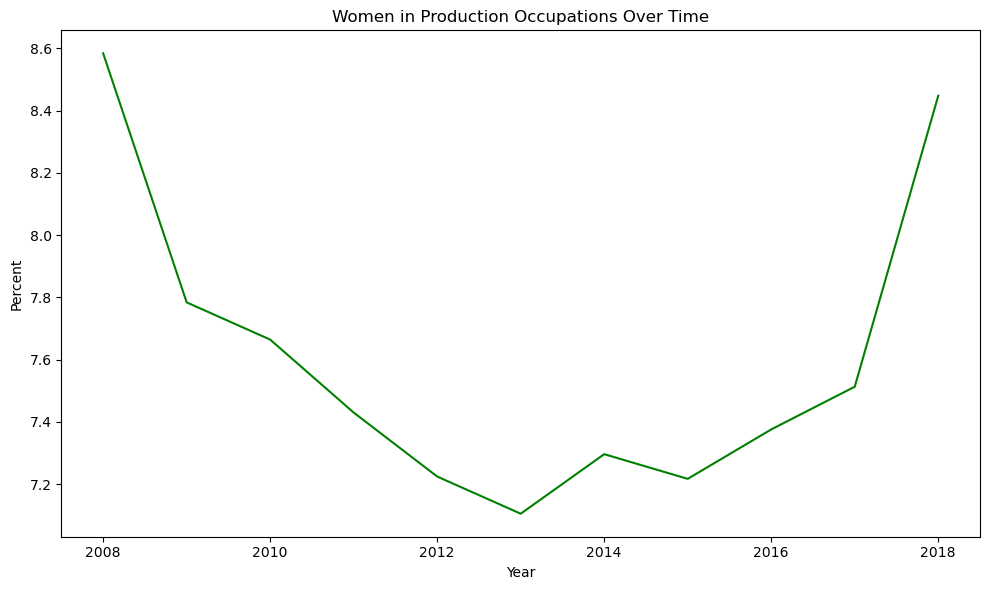

In [67]:
# Group by Year and calculate the mean percent of females in management positions
grouped_data = df.groupby('Year')['FEMP_P'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the FEMP_M variable
plt.plot(grouped_data['Year'], grouped_data['FEMP_P'], label='Percent of Women in Production Occupations', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Women in Production Occupations Over Time')

# Show the plot
plt.tight_layout()
plt.show()

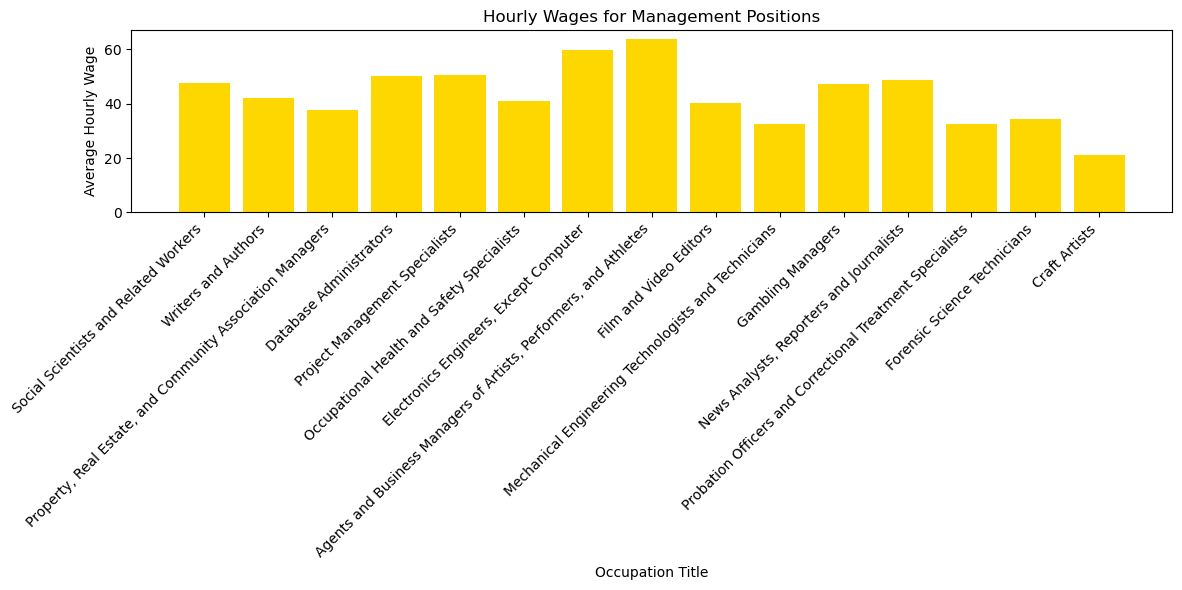

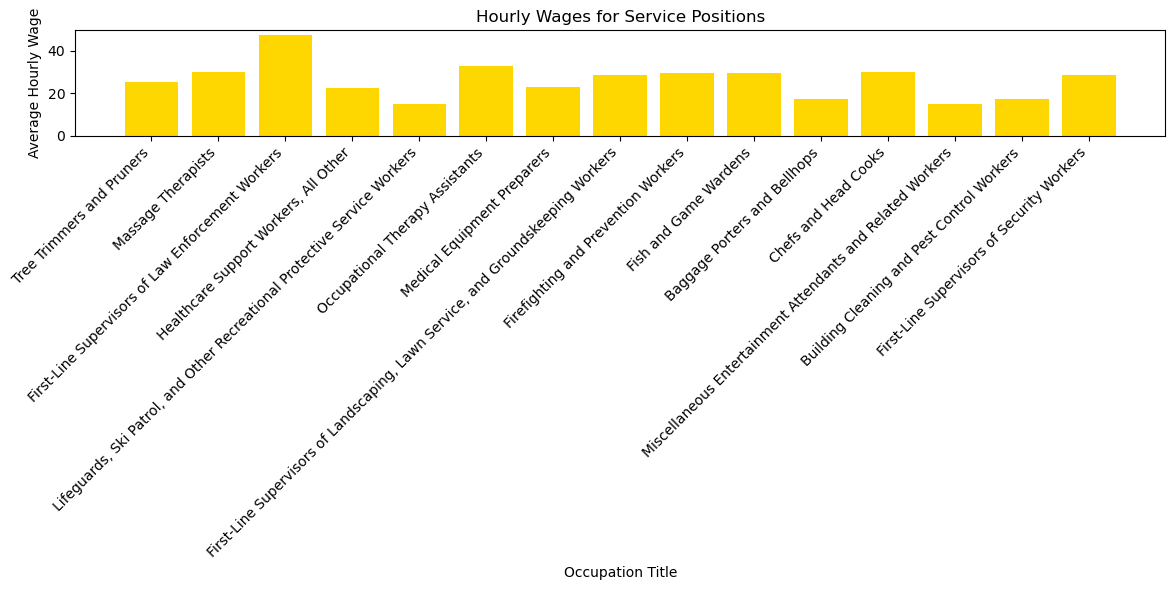

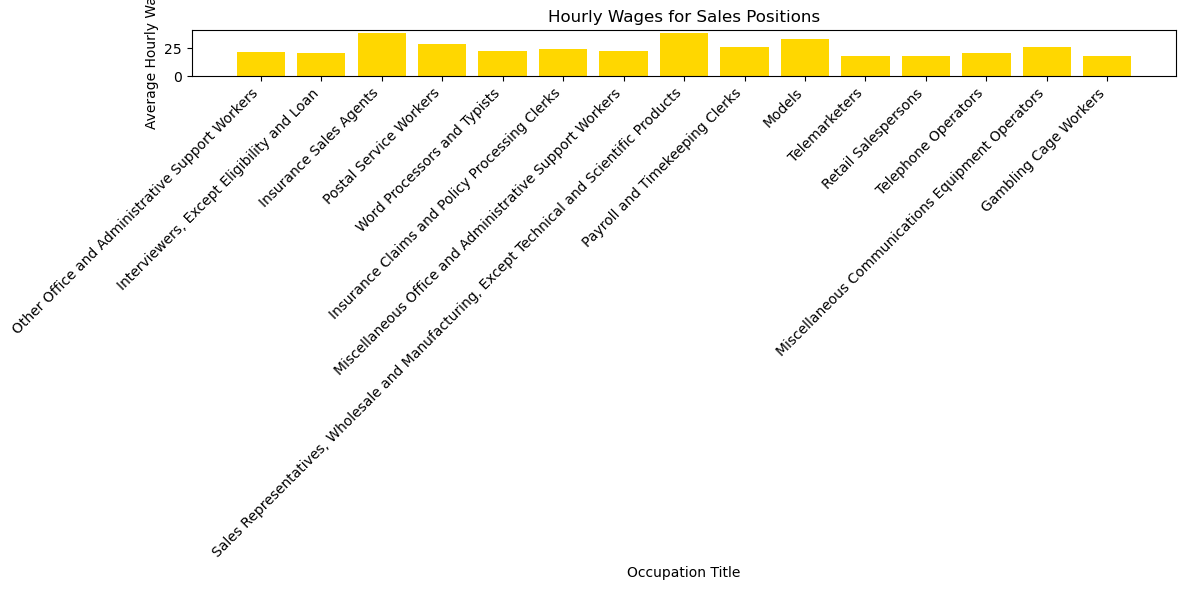

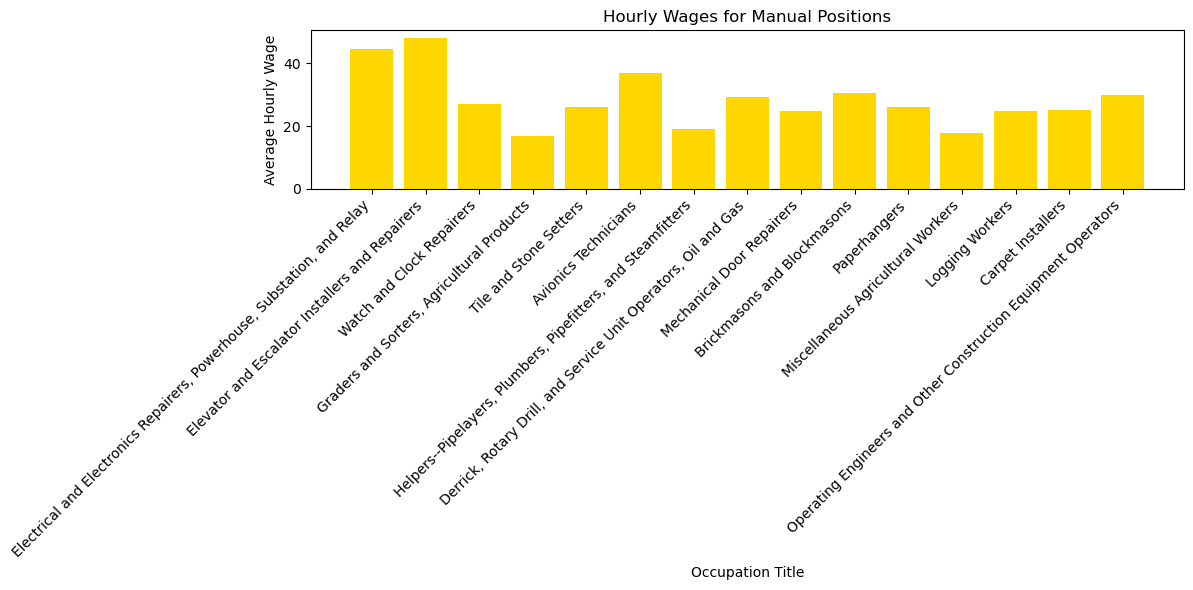

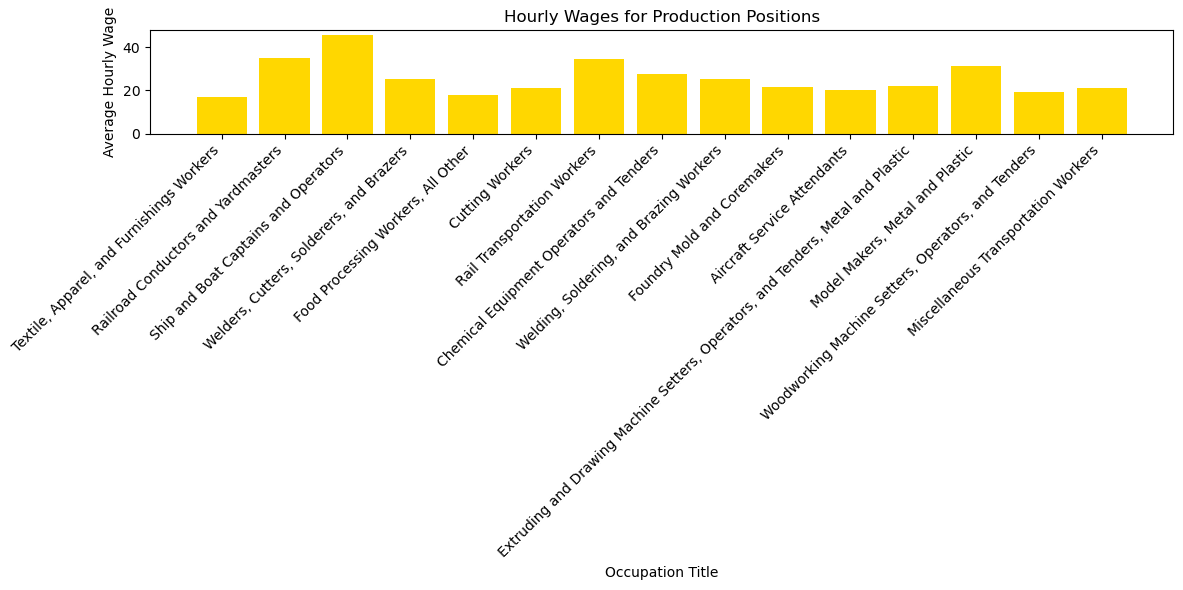

In [68]:
# Getting unique occupation categories
occupation_categories = wages['Occupation Category'].unique()

# Loop through each occupation category and create a separate bar chart
for category in occupation_categories:
    # Filtering  for the current category.
    category_df = wages[wages['Occupation Category'] == category]
    
    # Grouping by OCC_TITLE and calculating the mean H_MEAN.
    mean_wages = category_df.groupby('OCC_TITLE')['H_MEAN'].mean().reset_index()
    
    # Selecting 15 random OCC_TITLEs for better visuals.
    sample_mean_wages = mean_wages.sample(n=min(15, len(mean_wages)), random_state=1)

    # Create a bar chart for the current occupation category
    plt.figure(figsize=(12, 6))
    plt.bar(sample_mean_wages['OCC_TITLE'], sample_mean_wages['H_MEAN'], color='gold')
    plt.xlabel('Occupation Title')
    plt.ylabel('Average Hourly Wage')
    plt.title(f'Hourly Wages for {category} Positions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

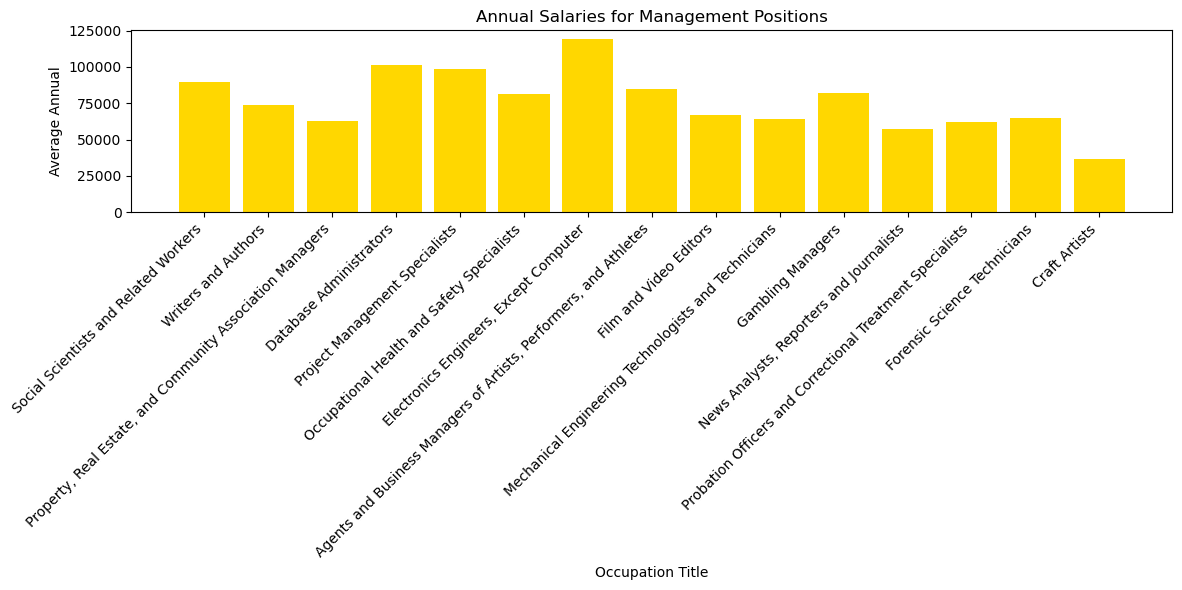

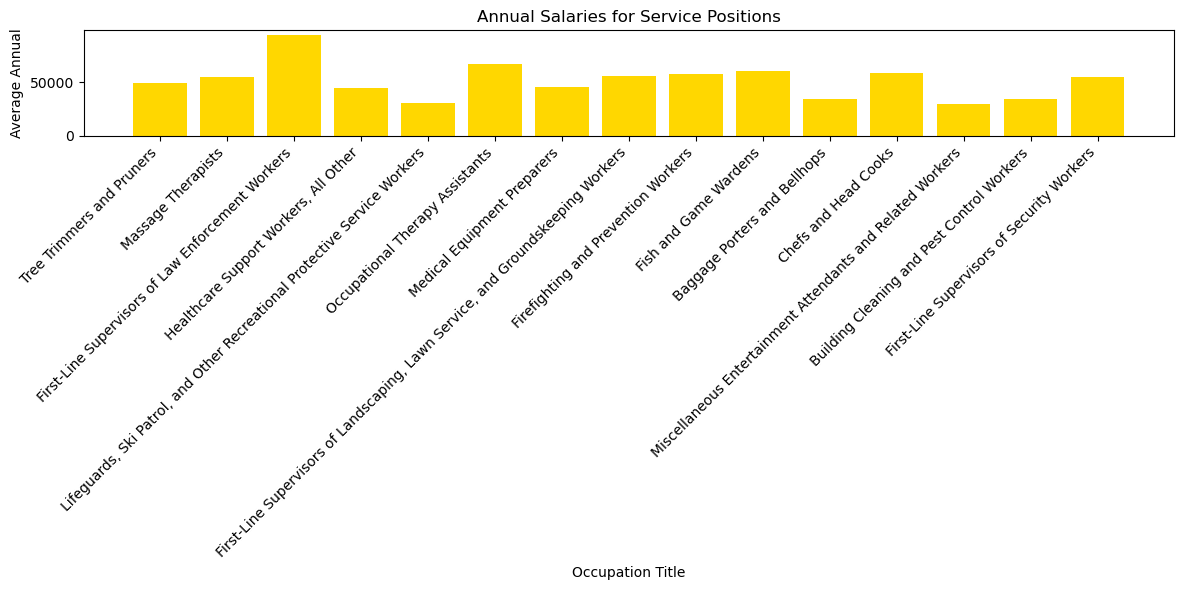

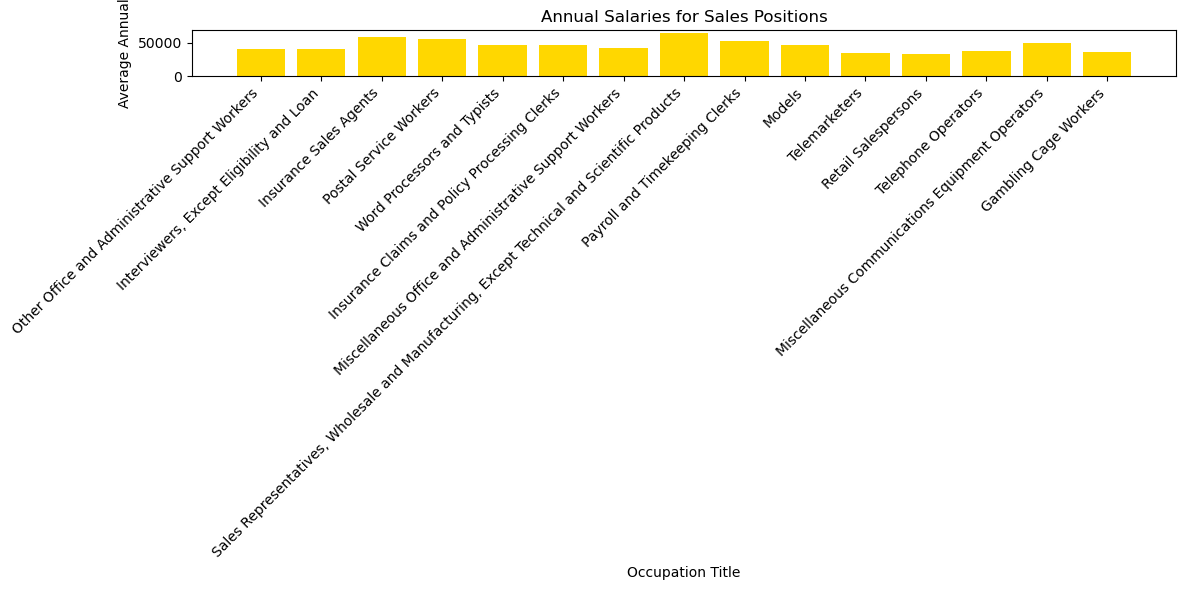

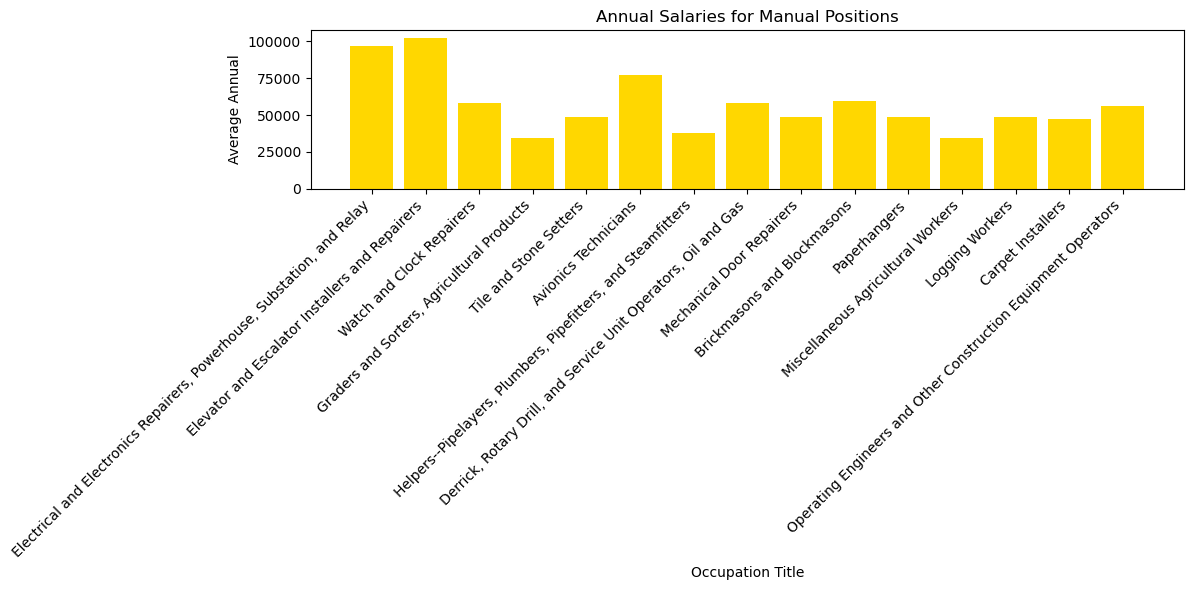

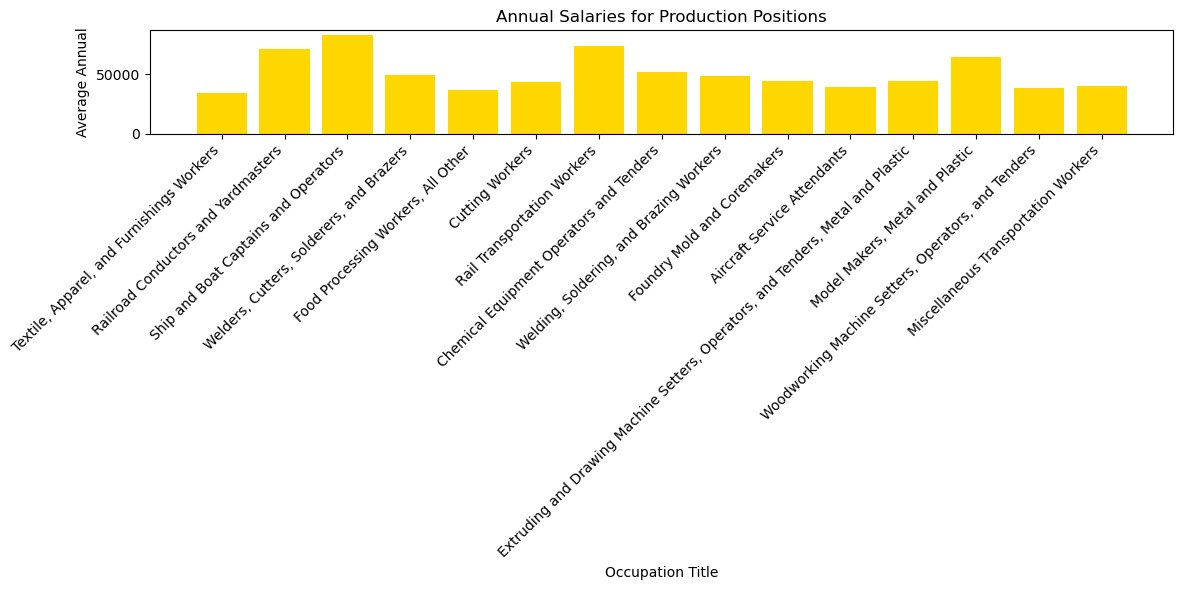

In [69]:
# Getting unique occupation categories
occupation_categories = wages['Occupation Category'].unique()

# Loop through each occupation category and create a separate bar chart
for category in occupation_categories:
    # Filtering  for the current category.
    category_df = wages[wages['Occupation Category'] == category]
    
    # Grouping by OCC_TITLE and calculating the mean H_MEAN.
    mean_wages = category_df.groupby('OCC_TITLE')['A_MEDIAN'].mean().reset_index()
    
    # Selecting 15 random OCC_TITLEs for better visuals.
    sample_mean_wages = mean_wages.sample(n=min(15, len(mean_wages)), random_state=1)

    # Create a bar chart for the current occupation category
    plt.figure(figsize=(12, 6))
    plt.bar(sample_mean_wages['OCC_TITLE'], sample_mean_wages['A_MEDIAN'], color='gold')
    plt.xlabel('Occupation Title')
    plt.ylabel('Average Annual')
    plt.title(f'Annual Salaries for {category} Positions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

In [70]:
# Define the list of columns to check
columns_to_check = [
    'Center Based Care: School Age',
    'Family Care: School Age',
    'Center Based Care: Infant',
    'Center Based Care: Toddler',
    'Center Based Care: Preschool Age',
    'Family Care: Infant',
    'Family Care: Toddler',
    'Family Care: Preschool Age'
]

# Find the minimum and maximum values across the specified columns
lowest_value = df[columns_to_check].min().min()  # Min of the min values
highest_value = df[columns_to_check].max().max()  # Max of the max values

# Display the results
print("Lowest Value:", lowest_value)
print("Highest Value:", highest_value)

Lowest Value: 33.1
Highest Value: 249.6


In [71]:
# Define the columns for infant care
infant_columns = [
    'Center Based Care: Infant',
    'Family Care: Infant'
]

# Calculate the average for the infant care columns
average_infant_care = df[infant_columns].mean()

# Display the results
print("Average Center Based Care: Infant:", average_infant_care['Center Based Care: Infant'])
print("Average Family Care: Infant:", average_infant_care['Family Care: Infant'])

# Calculate the overall average of the two infant care columns
overall_average_infant = df[infant_columns].mean().mean()

# Display the overall average
print("Overall Average of Infant Care:", overall_average_infant)


Average Center Based Care: Infant: 133.17995442244694
Average Family Care: Infant: 106.26888097611926
Overall Average of Infant Care: 119.7244176992831


In [72]:
# Define the columns for school age care
school_age_columns = [
    'Center Based Care: School Age',
    'Family Care: School Age'
]

# Calculate the average for the school age care columns
average_school_age_care = df[school_age_columns].mean()

# Display the results
print("Average Center Based Care: School Age:", average_school_age_care['Center Based Care: School Age'])
print("Average Family Care: School Age:", average_school_age_care['Family Care: School Age'])

# Calculate the overall average of the two school age care columns
overall_average_school_age = df[school_age_columns].mean().mean()

# Display the overall average
print("Overall Average of School Age Care:", overall_average_school_age)


Average Center Based Care: School Age: 94.5661496462992
Average Family Care: School Age: 87.0428794568675
Overall Average of School Age Care: 90.80451455158334
